In [2]:
import os
import numpy as np
import pandas as pd
import scanpy as sc
import loompy as lp
from MulticoreTSNE import MulticoreTSNE as TSNE
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import csv
import gzip
import anndata as ad
from pathlib import Path
import glob

sc.settings.verbosity = 3 # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()


-----
anndata     0.8.0
scanpy      1.9.1
-----
MulticoreTSNE               NA
PIL                         9.1.0
appnope                     0.1.2
asttokens                   NA
backcall                    0.2.0
beta_ufunc                  NA
binom_ufunc                 NA
cffi                        1.15.0
cloudpickle                 2.1.0
cycler                      0.10.0
cython_runtime              NA
cytoolz                     0.11.0
dask                        2022.9.0
dateutil                    2.8.2
debugpy                     1.5.1
decorator                   5.1.1
defusedxml                  0.7.1
entrypoints                 0.4
executing                   0.8.3
fsspec                      2022.8.2
h5py                        3.7.0
hypergeom_ufunc             NA
igraph                      0.10.1
ipykernel                   6.9.1
ipython_genutils            0.2.0
ipywidgets                  7.6.5
jedi                        0.18.1
jinja2                      3.0.3
joblib   

In [3]:
integrated_to_plot=pd.read_pickle('/Users/lidiayung/github/notebooks/GBM/calculation/integrated_to_plot.pkl')
integrated_to_plot

,Sample,Post-filtering,Percentage,Sum,percentage,Stage,Pair#,Age,Sex
0,SF10857,2094/142,93.65,886,25.000000,Primary,33,52.0,M
1,SF11916,916/71,92.81,916,91.666667,Primary,31,71.0,M
2,SF11815,3060/272,91.83,3060,96.875000,Primary,32,49.0,F
3,SF11873,166/2964,5.3,166,70.625000,Primary,36,64.0,F
4,SF2777,3323/385,89.62,3323,90.630000,Primary,11,29.0,F
...,...,...,...,...,...,...,...,...,...
74,SF10441,466/640,42.13,466,40.000000,Recurrent,2,56.0,M
75,SF9715v2,2536/1195,67.97,2536,NaN,NaN,NaN,NaN,NaN
76,SF12704,1189/639,65.04,1189,NaN,Recurrent,NaN,51.0,F
77,SF12704v2,1253/2919,30.03,1253,NaN,NaN,NaN,NaN,NaN


In [332]:
items = ['SF7307','SF11916','SF11815','SF10857']
new_rows = []
for item in items:
    row =integrated_to_plot[integrated_to_plot['Sample']== item]
    new_rows.append(row)
    
print(new_rows)

[    Sample Post-filtering Percentage  Sum  percentage    Stage Pair#   Age Sex
20  SF7307         153/46      76.88  153      54.375  Primary    23  60.0   M
67  SF7307         153/46      76.88  153      54.375  Primary    23  60.0   M,     Sample Post-filtering Percentage  Sum  percentage    Stage Pair#   Age Sex
1  SF11916         916/71      92.81  916   91.666667  Primary    31  71.0   M,     Sample Post-filtering Percentage   Sum  percentage    Stage Pair#   Age  \
2  SF11815       3060/272      91.83  3060      96.875  Primary    32  49.0   

  Sex  
2   F  ,     Sample Post-filtering Percentage  Sum  percentage    Stage Pair#   Age Sex
0  SF10857       2094/142      93.65  886        25.0  Primary    33  52.0   M]


In [13]:
integrated_to_plot[integrated_to_plot['Pair#']==33]

,Sample,Post-filtering,Percentage,Sum,percentage,Stage,Pair#,Age,Sex
0,SF10857,2094/142,93.65,886,25.0,Primary,33,52.0,M
26,SF12008,1488/1242,54.51,1488,52.0,Recurrent,33,54.0,M


In [73]:
integrated_to_plot['Sum']=pd.to_numeric(integrated_to_plot['Sum'], errors='coerce')

In [105]:
integrated_to_plot.to_pickle('/Users/lidiayung/github/notebooks/GBM/calculation/integrated_to_plot.pkl')

In [368]:
pairs['Pair#']=pd.to_numeric(pairs['Pair#'], errors='coerce')

In [360]:
pairs['Sum'] = pairs['Post-filtering'].str.split('/').str[0]
pairs['Sum']=pd.to_numeric(pairs['Sum'], errors='coerce')

In [372]:
pairs['Sum']=pd.to_numeric(pairs['Sum'], errors='coerce')

In [373]:
pairs

,Sample,Post-filtering,Percentage,Sum,percentage,Stage,Pair#,Age,Sex
0,SF3996,294/111,72.59,294,50.0,Recurrent,1,67.0,M
1,SF10099,437/116,79.02,437,56.25,Primary,2,55.0,M
2,SF10441,466/640,42.13,466,40.0,Recurrent,2,56.0,M
3,SF10565,245/2627,8.53,245,8.75,Recurrent,3,45.0,F
4,SF10432,434/19,95.81,434,87.5,Primary,4,50.0,F
...,...,...,...,...,...,...,...,...,...
66,SF11587,1252/47,96.38,1252,96.875,Primary,35,58.0,F
68,SF11873,166/2964,5.3,166,70.625,Primary,36,64.0,F
69,SF12754,510/1537,24.91,510,25.0,Recurrent,36,65.0,F
67,SF12407,29/1557,1.83,29,1.0,Recurrent,36,65.0,F


In [369]:
pairs = pairs[pairs['Pair#'].notnull()].sort_values('Pair#',ascending = True)
pairs.head(40)

,Sample,Post-filtering,Percentage,Sum,percentage,Stage,Pair#,Age,Sex
0,SF3996,294/111,72.59,294,50.0,Recurrent,1,67.0,M
1,SF10099,437/116,79.02,437,56.25,Primary,2,55.0,M
2,SF10441,466/640,42.13,466,40.0,Recurrent,2,56.0,M
3,SF10565,245/2627,8.53,245,8.75,Recurrent,3,45.0,F
4,SF10432,434/19,95.81,434,87.5,Primary,4,50.0,F
5,SF11248,906/982,47.99,906,48.0,Recurrent,4,52.0,F
6,SF11857,157/3236,4.63,157,6.0,Recurrent,5,69.0,M
7,SF10592,296/1037,22.21,296,23.0,Primary,5,66.0,M
9,SF11082,4021/111,97.31,4021,97.916667,Primary,6,59.0,F
8,SF11488,4257/155,96.49,4257,96.75,Recurrent,6,60.0,F


In [347]:
#to drop 19 66 18 67

pairs.drop([26],inplace=True)


In [196]:
pairs.update(pd.DataFrame.from_dict(new_row))

In [5]:
pairs = pd.read_pickle('/Users/lidiayung/github/notebooks/GBM/calculation/pairs.pkl')

In [377]:
pairs.to_pickle('/Users/lidiayung/github/notebooks/GBM/calculation/pairs.pkl')

In [370]:
pairs.head(40)

,Sample,Post-filtering,Percentage,Sum,percentage,Stage,Pair#,Age,Sex
0,SF3996,294/111,72.59,294,50.0,Recurrent,1,67.0,M
1,SF10099,437/116,79.02,437,56.25,Primary,2,55.0,M
2,SF10441,466/640,42.13,466,40.0,Recurrent,2,56.0,M
3,SF10565,245/2627,8.53,245,8.75,Recurrent,3,45.0,F
4,SF10432,434/19,95.81,434,87.5,Primary,4,50.0,F
5,SF11248,906/982,47.99,906,48.0,Recurrent,4,52.0,F
6,SF11857,157/3236,4.63,157,6.0,Recurrent,5,69.0,M
7,SF10592,296/1037,22.21,296,23.0,Primary,5,66.0,M
9,SF11082,4021/111,97.31,4021,97.916667,Primary,6,59.0,F
8,SF11488,4257/155,96.49,4257,96.75,Recurrent,6,60.0,F


In [247]:
#new_row = [{'Sample': 'SF10857', 'Post-filtering': '2094/142','Percentage':'93.65'}]
new_row = [{'Sample': 'SF2501', 'Post-filtering': '231/92','Percentage':'71.52','Pair#':'10'}]

In [252]:
new_row = [{'Sample': 'SF6809', 'Post-filtering': '127/55','Percentage':'67.00','Pair#':21}]

In [371]:
pairs.tail(30)

,Sample,Post-filtering,Percentage,Sum,percentage,Stage,Pair#,Age,Sex
41,SF7307,153/46,76.88,153,54.375,Primary,23,60.0,M
42,SF12165,756/2381,24.1,756,24.0,Recurrent,24,40.0,F
43,SF9510,756/4148,15.42,756,19.0,Recurrent,25,73.0,M
44,SF9962,2660/808,76.7,2660,75.5,Recurrent,26,61.0,M
45,SF9358,494/2616,15.88,494,16.0,Primary,26,60.0,M
46,SF9798,3849/200,95.06,3849,93.75,Primary,27,64.0,M
47,SF9494,748/2706,21.66,748,23.25,Recurrent,27,64.0,M
49,SF10108,2821/1584,64.04,2821,59.0,Recurrent,28,47.0,M
48,SF9871,6/3592,0.17,6,0.0,Primary,28,46.0,M
51,SF10433,502/670,42.83,502,17.5,Recurrent,29,53.0,F


In [240]:
new_row = [{'Sample': 'SF1199', 'Post-filtering': '111/11','Percentage':'90.98','Pair#':8}]

In [357]:
new_row = [{'Sample': 'SF3996', 'Post-filtering': '294/111','Percentage':'72.59','Pair#':15}]


In [342]:
pairs.update(pd.DataFrame.from_dict(new_row))

In [358]:
pairs = pairs.append(new_row, ignore_index=True)


/var/folders/qq/n8l4bgxs53j_s3twq5jzc7g00000gn/T/ipykernel_36945/2834396713.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pairs = pairs.append(new_row, ignore_index=True)


In [195]:
new_row= [{'Sample': 'SF11873', 'Post-filtering': '166/2964','Percentage':'5.3','percentage':'70.625',
           'Stage':'Primary','Pair#':'36','Age':'55.0','Sex':'F'}]

In [120]:
#to update
new_row = [{'Sample': 'SF3996', 'Post-filtering': '294/111','Percentage':'72.59'},
           {'Sample': 'SF6118', 'Post-filtering': '133/357','Percentage':'27.14'},
           {'Sample': 'SF7025', 'Post-filtering': '77/72','Percentage':'51.68'},
           {'Sample': 'SF9358', 'Post-filtering': '494/2616','Percentage':'15.88'},
           {'Sample': 'SF4324', 'Post-filtering': '886/2779','Percentage':'24.17'}]


AttributeError: 'NoneType' object has no attribute 'update'

In [147]:
integrated_to_plot.update(pd.DataFrame.from_dict(new_row))

In [222]:
print(111/(111+11))

0.9098360655737705


In [76]:
integrated_to_plot.update(new_row)

In [123]:
integrated_to_plot

,Sample,Post-filtering,Percentage,Sum,percentage,Stage,Pair#,Age,Sex
0,SF3996,294/111,72.59,886,25.000000,Primary,33,52.0,M
1,SF6118,133/357,27.14,916,91.666667,Primary,31,71.0,M
2,SF7025,77/72,51.68,3060,96.875000,Primary,32,49.0,F
3,SF9358,494/2616,15.88,166,70.625000,Primary,36,64.0,F
4,SF4324,886/2779,24.17,3323,90.630000,Primary,11,29.0,F
...,...,...,...,...,...,...,...,...,...
74,SF10441,466/640,42.13,466,40.000000,Recurrent,2,56.0,M
75,SF9715v2,2536/1195,67.97,2536,NaN,NaN,NaN,NaN,NaN
76,SF12704,1189/639,65.04,1189,NaN,Recurrent,NaN,51.0,F
77,SF12704v2,1253/2919,30.03,1253,NaN,NaN,NaN,NaN,NaN


In [81]:
integrated_to_plot[integrated_to_plot['Sample']=='SF10857']

,Sample,Post-filtering,Percentage,Sum,percentage,Stage,Pair#,Age,Sex
0,SF10857,2094/142,93.65,886,25.0,Primary,NaN,61.0,F


In [283]:
pairs=pairs.drop(columns=['Stage_x','Pair#_x','Age_x','Sex_x','Stage_y','Pair#_y','Age_y','Sex_y'])

In [284]:
pairs

,Sample,Post-filtering,Percentage,Sum,percentage
0,SF1199,111/11,90.98,1449.0,50.0
1,SF10099,437/116,79.02,437.0,56.25
2,SF10441,466/640,42.13,466.0,40.0
3,SF10565,245/2627,8.53,245.0,8.75
4,SF10432,434/19,95.81,434.0,87.5
...,...,...,...,...,...
60,SF11720,630/906,41.02,630.0,20.0
61,SF1199,111/11,90.98,NaN,NaN
62,SF2501,231/92,71.52,NaN,NaN
63,SF6809,127/55,67.00,NaN,NaN


In [285]:
to_join = pd.read_excel('/Users/lidiayung/project/resource/descriptive.xlsx')
df_select = to_join.iloc[:, [0, 1, 2, 4, 5]]
df_select.rename(columns={'ID':'Sample'},inplace= True)

/var/folders/qq/n8l4bgxs53j_s3twq5jzc7g00000gn/T/ipykernel_36945/3156440438.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select.rename(columns={'ID':'Sample'},inplace= True)


In [286]:
pairs = pairs.merge(df_select, on='Sample',how='left')
pairs

,Sample,Post-filtering,Percentage,Sum,percentage,Stage,Pair#,Age,Sex
0,SF1199,111/11,90.98,1449.0,50.0,Primary,8,57.0,M
1,SF10099,437/116,79.02,437.0,56.25,Primary,2,55.0,M
2,SF10441,466/640,42.13,466.0,40.0,Recurrent,2,56.0,M
3,SF10565,245/2627,8.53,245.0,8.75,Recurrent,3,45.0,F
4,SF10432,434/19,95.81,434.0,87.5,Primary,4,50.0,F
...,...,...,...,...,...,...,...,...,...
60,SF11720,630/906,41.02,630.0,20.0,Recurrent,37,56.0,M
61,SF1199,111/11,90.98,NaN,NaN,Primary,8,57.0,M
62,SF2501,231/92,71.52,NaN,NaN,Primary,10,55.0,F
63,SF6809,127/55,67.00,NaN,NaN,Primary,21,57.0,M


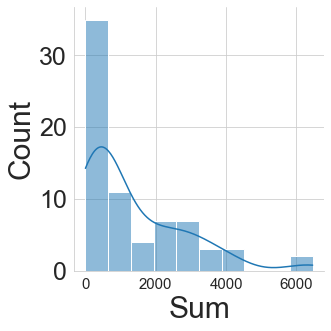

In [8]:
sns.displot(pairs, x='Sum',kde=True, bins=10)

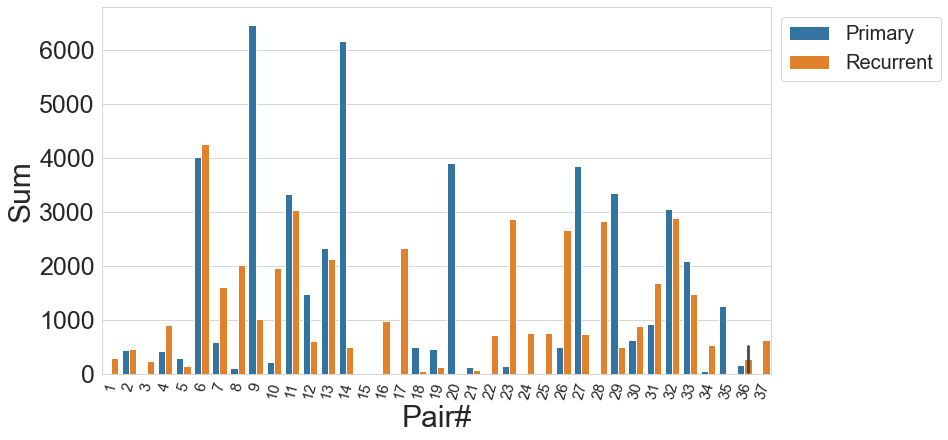

In [7]:
plt.rcParams.update({'font.size':20, 'font.family':'sans-serif', 
                            'xtick.labelsize':15, 'ytick.labelsize':25, 'figure.figsize':(12, 6.75), 
                            'axes.labelsize':30})
sns.set_style("whitegrid")

sns.barplot(data=pairs, y='Sum', x='Pair#', hue='Stage',hue_order = ['Primary','Recurrent'])
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.xticks(rotation=75)

plt.show()

In [ ]:
#Pair 7,12,31
#Pair 13 'SF3076''SF3243'
# 11 'SF2777','SF2979'
# 6 SF11082
#33 

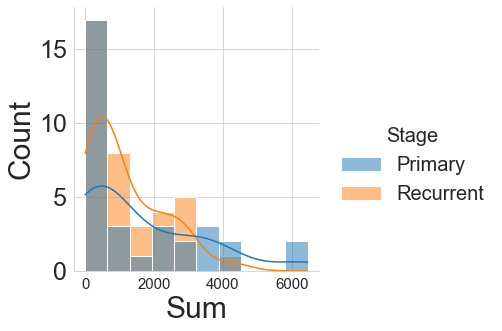

In [10]:
sns.displot(pairs, x='Sum', hue='Stage',hue_order = ['Primary','Recurrent'], kde=True, bins=10)

plt.grid(True)

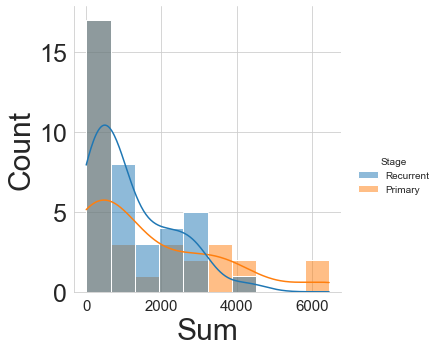

In [6]:
sns.displot(pairs, x='Sum', hue='Stage', kde=True, bins=10)

plt.grid(True)

In [ ]:
#Pair 7,12,31
#Pair 13 'SF3076''SF3243'
# 11 'SF2777','SF2979'
# 6 'SF11082','SF1488'

In [54]:
def readann(sample):
    input_folder = "/Users/lidiayung/project/specimens"
    input_path = os.path.join(input_folder, sample) 
    
    results_file = f"{input_path}/gbm.h5ad"
    
    print(input_path)
    f_anndata_path = f"{input_path}/anndata.h5ad"
    adata = sc.read_h5ad( f_anndata_path )
    
    sc.pp.normalize_total(adata, target_sum=1e4, exclude_highly_expressed=True)

    sc.pp.log1p(adata)
    
    sc.pp.filter_genes_dispersion(adata, n_top_genes=2000)
    sc.pl.filter_genes_dispersion(adata)
    
    pca = PCA(n_components=15)
    adata.obsm["X_pca"] = pca.fit_transform(adata.X)
    
    # Perform t-SNE with default parameters
    tsne = TSNE(random_state=42)
    adata.obsm["X_tsne"] = tsne.fit_transform(adata.obsm["X_pca"])

    # Save the anndata object
    adata.write_h5ad(results_file)

    return adata

The snRNA-seq data were processed with Seurat v.3 (ref. 47). Data were normalized via the LogNormalize method with scale.factor of 10,000 using the NormalizeData function. 

Highly variable genes were identified via Seurat using the mean.var.plot method with default parameters. Based on these genes, 


a PCA was performed and the first 15 PCs were retained for clustering and visualization via t-SNE.

In [101]:
readann('SF11082')

/Users/lidiayung/project/specimens/SF11082
  (0, 14)	0.6931472
  (0, 27)	0.6931472
  (0, 28)	0.6931472
  (0, 49)	0.6931472
  (0, 52)	0.6931472
  (0, 78)	0.6931472
  (0, 86)	1.7917595
  (0, 99)	0.6931472
  (0, 115)	0.6931472
  (0, 126)	0.6931472
  (0, 175)	0.6931472
  (0, 176)	0.6931472
  (0, 180)	0.6931472
  (0, 184)	0.6931472
  (0, 190)	0.6931472
  (0, 194)	2.0794415
  (0, 222)	1.0986123
  (0, 228)	0.6931472
  (0, 262)	0.6931472
  (0, 333)	0.6931472
  (0, 359)	1.0986123
  (0, 375)	0.6931472
  (0, 405)	0.6931472
  (0, 430)	0.6931472
  (0, 441)	0.6931472
  :	:
  (4020, 32956)	0.6931472
  (4020, 32961)	0.6931472
  (4020, 32992)	0.6931472
  (4020, 33012)	0.6931472
  (4020, 33030)	1.0986123
  (4020, 33043)	0.6931472
  (4020, 33051)	1.0986123
  (4020, 33093)	0.6931472
  (4020, 33118)	0.6931472
  (4020, 33190)	0.6931472
  (4020, 33221)	0.6931472
  (4020, 33250)	1.3862944
  (4020, 33285)	1.3862944
  (4020, 33313)	0.6931472
  (4020, 33379)	0.6931472
  (4020, 33398)	0.6931472
  (4020, 33406)	0.

In [4]:
integrated_to_plot.update(pairs)

In [12]:
integrated_to_plot

,Sample,Post-filtering,Percentage,Sum,percentage,Stage,Pair#,Age,Sex,difference
0,SF3996,294/111,72.59,294.0,50.00,Recurrent,1.0,67.0,M,22.59
1,SF10099,437/116,79.02,437.0,56.25,Primary,2.0,55.0,M,22.77
2,SF10441,466/640,42.13,466.0,40.00,Recurrent,2.0,56.0,M,2.13
3,SF10565,245/2627,8.53,245.0,8.75,Recurrent,3.0,45.0,F,0.22
4,SF10432,434/19,95.81,434.0,87.50,Primary,4.0,50.0,F,8.31
...,...,...,...,...,...,...,...,...,...,...
74,SF10441,466/640,42.13,466.0,40.00,Recurrent,2,56.0,M,2.13
75,SF9715v2,2536/1195,67.97,2536.0,NaN,NaN,NaN,NaN,NaN,NaN
76,SF12704,1189/639,65.04,1189.0,NaN,Recurrent,NaN,51.0,F,NaN
77,SF12704v2,1253/2919,30.03,1253.0,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
integrated_to_plot['Percentage'] = pd.to_numeric(integrated_to_plot['Percentage'])

In [14]:
integrated_to_plot['percentage'] = pd.to_numeric(integrated_to_plot['percentage'])

In [12]:
integrated_to_plot['difference']=abs(integrated_to_plot['Percentage']-integrated_to_plot['percentage'])

TypeError: unsupported operand type(s) for -: 'str' and 'float'

In [13]:
integrated_to_plot.to_pickle('/Users/lidiayung/github/notebooks/GBM/calculation/summary.pkl')

In [16]:
integrated_to_plot= pd.read_pickle('/Users/lidiayung/github/notebooks/GBM/calculation/summary.pkl')

In [20]:
no_more_than_5 = integrated_to_plot[integrated_to_plot['difference']<=5]

In [21]:
no_more_than_5= no_more_than_5.sort_values('Pair#',ascending = True)
no_more_than_5['Pair#']=no_more_than_5['Pair#'].astype(int)
no_more_than_5.head(44)

,Sample,Post-filtering,Percentage,Sum,percentage,Stage,Pair#,Age,Sex,difference
2,SF10441,466/640,42.13,466.0,40.000000,Recurrent,2,56.0,M,2.130000
74,SF10441,466/640,42.13,466.0,40.000000,Recurrent,2,56.0,M,2.130000
3,SF10565,245/2627,8.53,245.0,8.750000,Recurrent,3,45.0,F,0.220000
5,SF11248,906/982,47.99,906.0,48.000000,Recurrent,4,52.0,F,0.010000
7,SF10592,296/1037,22.21,296.0,23.000000,Primary,5,66.0,M,0.790000
6,SF11857,157/3236,4.63,157.0,6.000000,Recurrent,5,69.0,M,1.370000
8,SF11488,4257/155,96.49,4257.0,96.750000,Recurrent,6,60.0,F,0.260000
9,SF11082,4021/111,97.31,4021.0,97.916667,Primary,6,59.0,F,0.606667
10,SF11344,589/5194,10.19,589.0,11.111111,Primary,7,37.0,F,0.921111
12,SF1343,2021/688,74.60,2021.0,75.000000,Recurrent,8,57.0,M,0.400000


In [22]:
more_than_500 = no_more_than_5[no_more_than_5['Sum']>=450]

In [25]:
more_than_500.head(36)

,Sample,Post-filtering,Percentage,Sum,percentage,Stage,Pair#,Age,Sex,difference
2,SF10441,466/640,42.13,466.0,40.000000,Recurrent,2,56.0,M,2.130000
74,SF10441,466/640,42.13,466.0,40.000000,Recurrent,2,56.0,M,2.130000
5,SF11248,906/982,47.99,906.0,48.000000,Recurrent,4,52.0,F,0.010000
8,SF11488,4257/155,96.49,4257.0,96.750000,Recurrent,6,60.0,F,0.260000
9,SF11082,4021/111,97.31,4021.0,97.916667,Primary,6,59.0,F,0.606667
10,SF11344,589/5194,10.19,589.0,11.111111,Primary,7,37.0,F,0.921111
12,SF1343,2021/688,74.60,2021.0,75.000000,Recurrent,8,57.0,M,0.400000
15,SF11780,6462/216,96.77,6462.0,96.875000,Primary,9,46.0,F,0.105000
17,SF2628,1958/578,77.21,1958.0,75.700000,Recurrent,10,45.0,F,1.510000
19,SF2979,3028/1247,70.83,3028.0,66.500000,Recurrent,11,30.0,F,4.330000


In [41]:
to_retrieve = list(set(no_more_than_5['Pair#']))

In [17]:
to_check = integrated_to_plot[integrated_to_plot['Pair#'].notnull()]

In [18]:
to_check

,Sample,Post-filtering,Percentage,Sum,percentage,Stage,Pair#,Age,Sex,difference
0,SF3996,294/111,72.59,294.0,50.00,Recurrent,1.0,67.0,M,22.59
1,SF10099,437/116,79.02,437.0,56.25,Primary,2.0,55.0,M,22.77
2,SF10441,466/640,42.13,466.0,40.00,Recurrent,2.0,56.0,M,2.13
3,SF10565,245/2627,8.53,245.0,8.75,Recurrent,3.0,45.0,F,0.22
4,SF10432,434/19,95.81,434.0,87.50,Primary,4.0,50.0,F,8.31
...,...,...,...,...,...,...,...,...,...,...
70,SF11720,630/906,41.02,630.0,20.00,Recurrent,37.0,56.0,M,21.02
71,SF3996,294/111,72.59,294.0,23.00,Primary,15.0,66.0,M,49.59
72,SF10108,2821/1584,64.04,2821.0,59.00,Recurrent,28,47.0,M,5.04
73,SF10433,502/670,42.83,502.0,17.50,Recurrent,29,53.0,F,25.33


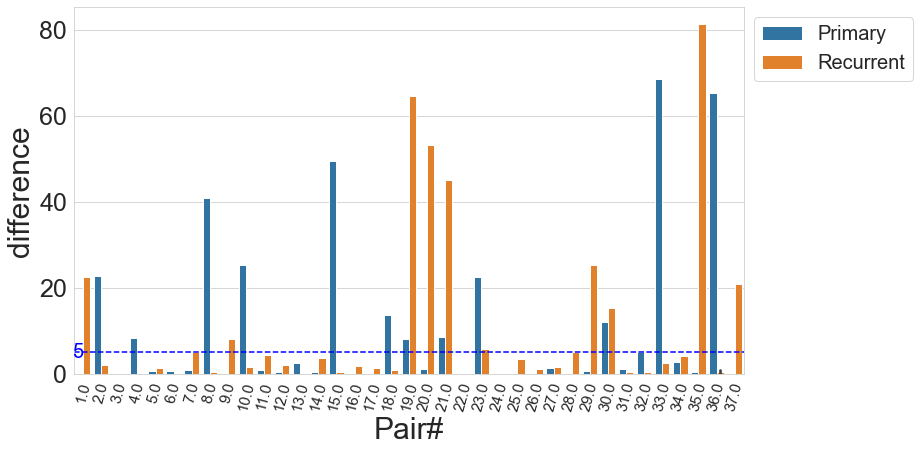

In [19]:
plt.rcParams.update({'font.size':20, 'font.family':'sans-serif', 
                            'xtick.labelsize':15, 'ytick.labelsize':25, 'figure.figsize':(12, 6.75), 
                            'axes.labelsize':30})
fig,ax= plt.subplots()

sns.set_style("whitegrid")

sns.barplot(data=to_check, y='difference', x='Pair#', hue='Stage',hue_order = ['Primary','Recurrent'])
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.xticks(rotation=75)

plt.axhline(y=5, color='b', linestyle='--')
ax.text(0, 5, '5', color='b', ha='right', va='center')


plt.show()

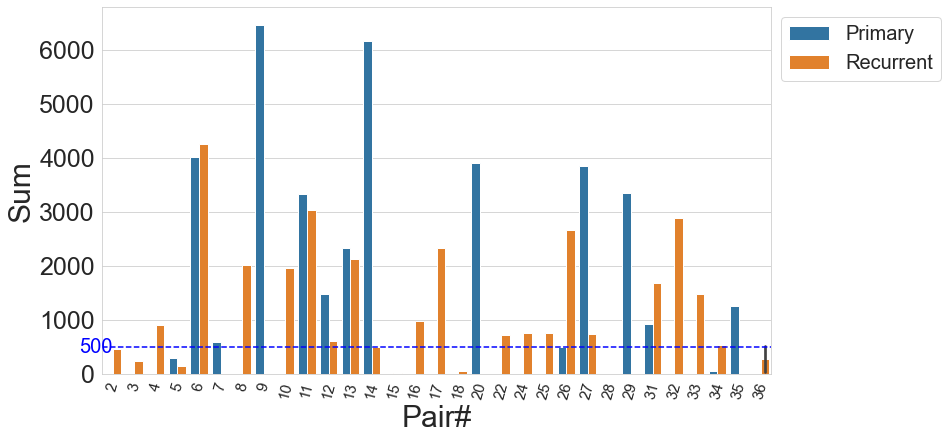

In [34]:
plt.rcParams.update({'font.size':20, 'font.family':'sans-serif', 
                            'xtick.labelsize':15, 'ytick.labelsize':25, 'figure.figsize':(12, 6.75), 
                            'axes.labelsize':30})
fig,ax= plt.subplots()

sns.set_style("whitegrid")

sns.barplot(data=no_more_than_5, y='Sum', x='Pair#', hue='Stage',hue_order = ['Primary','Recurrent'])
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.xticks(rotation=75)
plt.axhline(y=500, color='b', linestyle='--')
ax.text(0, 500, '500', color='b', ha='right', va='center')



plt.show()